In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uit-x-thpt-stress-dataset/feature_set.npy
/kaggle/input/uit-x-thpt-stress-dataset/train.csv
/kaggle/input/uit-x-thpt-stress-dataset/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/uit-x-thpt-stress-dataset/train.csv')
featured_indices = np.load('/kaggle/input/uit-x-thpt-stress-dataset/feature_set.npy')
print(featured_indices)
featured_df = train_df.loc[featured_indices]


train_df.head(5)

[  9.  38.  41.  43.  53.  61.  78.  92.  94.  99. 101. 114. 132. 140.
 147. 161. 163. 165. 167. 184. 195. 209. 210. 212. 229. 235. 245. 251.
 252. 264. 292. 301. 307. 321. 328. 334. 340. 360. 365. 369. 384. 391.
 413. 414. 432. 444. 451. 462. 466. 497. 506. 507. 509. 519. 529. 530.
 533. 537. 552. 553. 556. 557. 571. 574. 584. 593. 598. 617. 636. 638.
 654. 656. 689. 695. 705. 706. 708. 716. 719. 727. 740. 742. 744. 746.
 751. 765. 767. 779. 783. 792. 819. 834. 836. 843. 849. 857. 875.]


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,13,25,1,10,2,1,2,2,2,2,...,3,3,2,3,2,2,3,3,2,1
1,19,11,1,25,4,3,1,5,5,1,...,2,1,4,2,4,1,5,5,5,2
2,1,25,0,3,1,2,5,1,1,4,...,4,4,1,4,1,3,1,2,1,0
3,15,10,1,17,4,3,1,5,5,1,...,2,1,5,1,4,1,5,4,5,2
4,7,27,0,0,1,2,4,2,2,3,...,4,4,1,4,1,3,2,1,1,0


<h1> EDA </h1>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='stress_level', ylabel='count'>

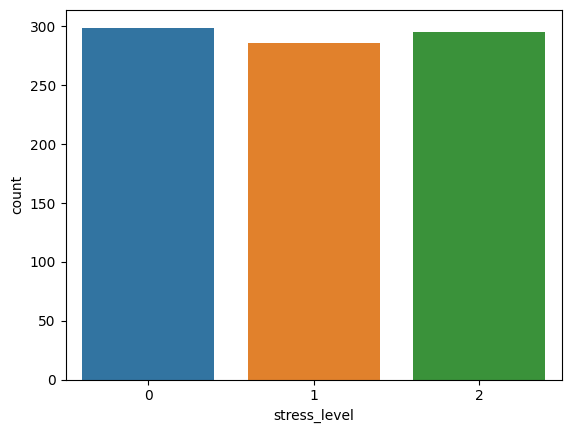

In [4]:
# print(train_df)
train_df = pd.read_csv('/kaggle/input/uit-x-thpt-stress-dataset/train.csv')
sns.countplot(train_df, x = train_df['stress_level'])

#Đánh giá đầu tiên là: các class khá cân bằng

In [5]:
def VariableAnalysis(df, columns):
    fig, axs = plt.subplots(2, 2, figsize = (12, 12))

    for i in range(2):
        for j in range(2):
            sns.countplot(x = df[columns[i * 2 + j]], hue = df['stress_level'], ax = axs[i, j])

    plt.show()

    for i in range(2):
        for j in range(2):
            print(f'the field {columns[i * 2 + j]} lacks {sum(df[columns[i * 2 + j]].isna())}')


<h2 style = 'font-size: 25px'> Psychological Factor </h2>


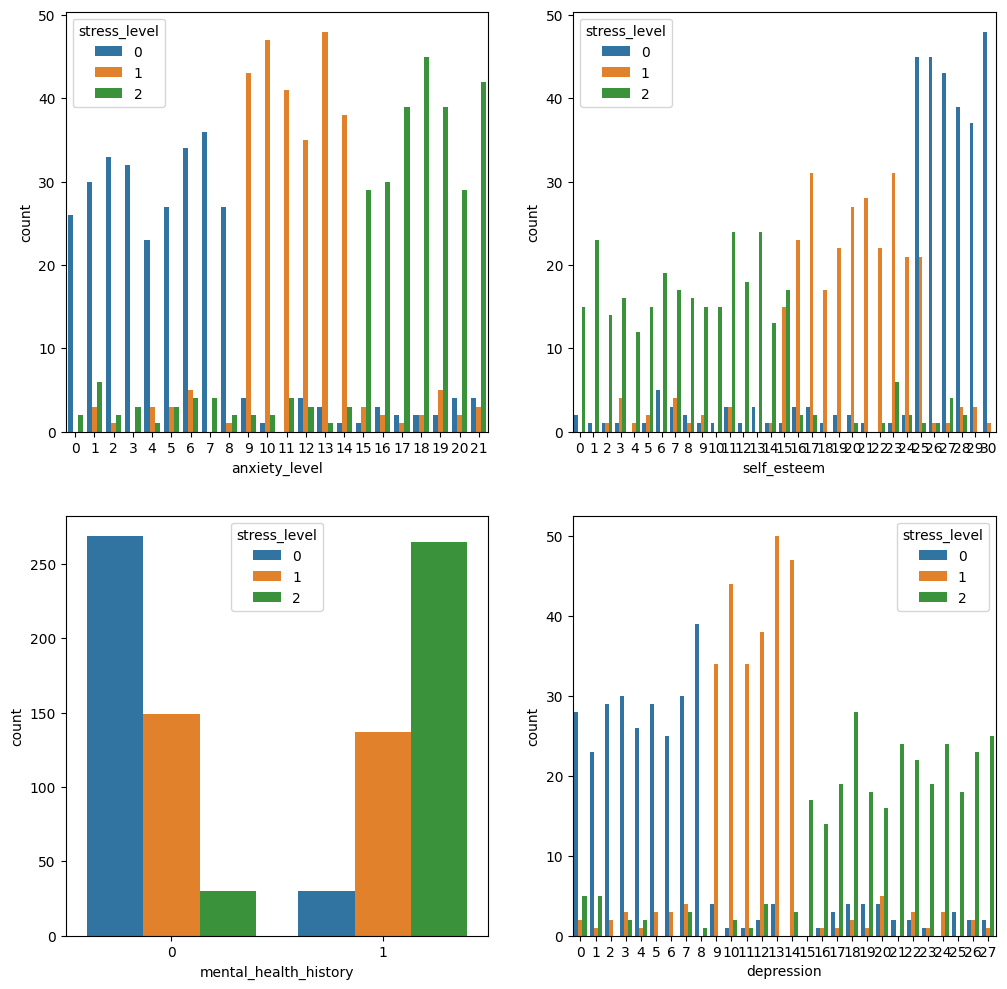

the field anxiety_level lacks 0
the field self_esteem lacks 0
the field mental_health_history lacks 0
the field depression lacks 0


'\nTừ việc phân tích đơn biến, ta có thể thấy rằng:\nanxiety_level: \n- anxiety_level: thấp thì sẽ không có stress\n- anxiety vừa: thì đa số sẽ tạo ra eugenic stress\n- anxiety cao: đa số dẫn đến distress\n\nself_esteem (mức đánh giá bản thân): \n- cao (từ ): không stress\n- vừa: eugenic stress (kiểu ngang)\n- thấp: distress\n\nmental_health_factor(có tiền sử tâm lý):\n0: hầu như là ko stress/eugstress\n1: hầu như là distress/eutress\n\ndepression: giống như anxiety_level\n'

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = train_df.columns[0:4]

VariableAnalysis(train_df, columns)
# sns.countplot(x = train_df['anxiety_level'], hue = train_df['stress_level'])

'''
Từ việc phân tích đơn biến, ta có thể thấy rằng:
anxiety_level: 
- anxiety_level: thấp thì sẽ không có stress
- anxiety vừa: thì đa số sẽ tạo ra eugenic stress
- anxiety cao: đa số dẫn đến distress

self_esteem (mức đánh giá bản thân): 
- cao (từ ): không stress
- vừa: eugenic stress (kiểu ngang)
- thấp: distress

mental_health_factor(có tiền sử tâm lý):
0: hầu như là ko stress/eugstress
1: hầu như là distress/eutress

depression: giống như anxiety_level
'''

<h2> Physiological factors</h2>

Index(['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'], dtype='object')


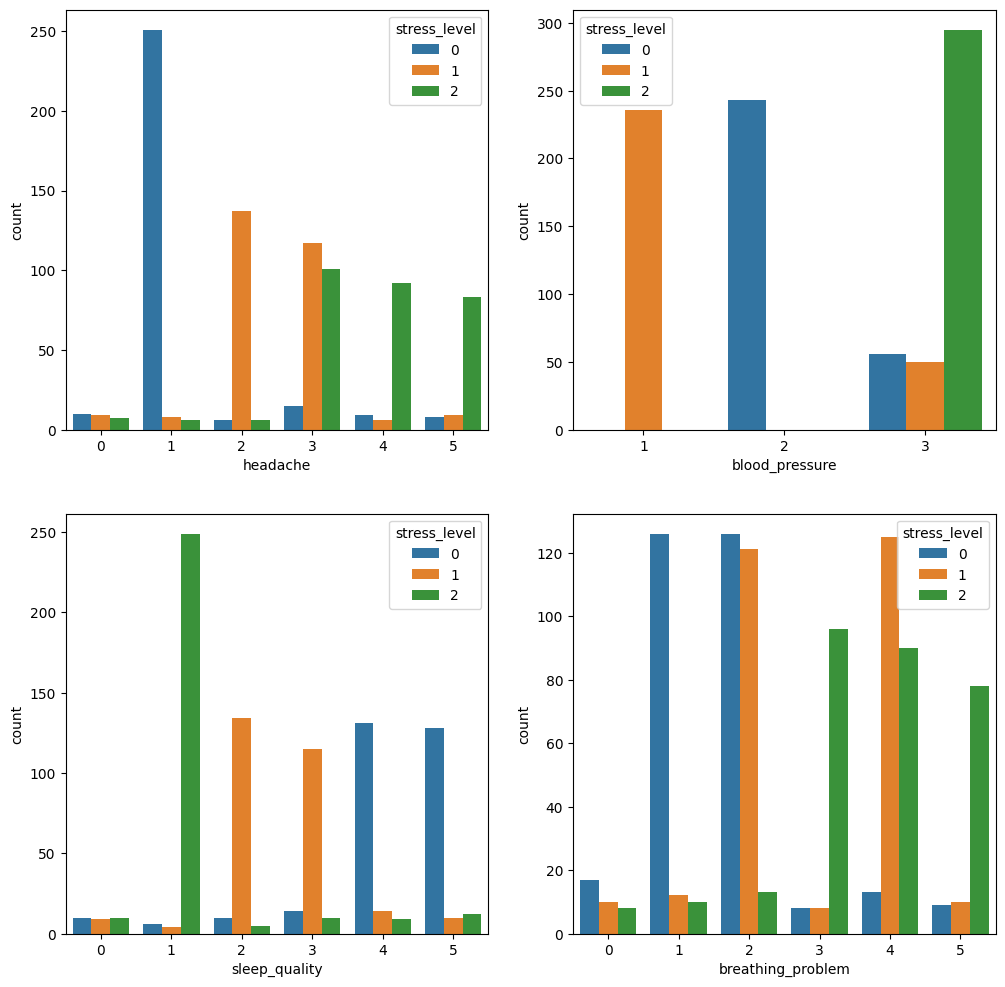

the field headache lacks 0
the field blood_pressure lacks 0
the field sleep_quality lacks 0
the field breathing_problem lacks 0


'\nheadache: \n0: cân bằng\ntừ 1-5: chuyển dịch dần từ 0-->2\n- Nhóm 3: đặc biệt khi nó là điểm giao thoa giữa hai nhóm eustress và distress.\n\nblood_pressure: \n1: eustress\n2: ko stress\n3: chủ yếu là distress\n\nsleep_quality:\n0: như nhau - indecisive\n1-5: distress --> eugenic --> ko stress\n\nbreathing problem:\n0: như nhau.\n1: no stress\n2: eugenic stress + no_stress\n3, 4, 5: distress chiếm một lượng rất lớn.\nđặc biệt có 4: lại tạo ra eugenic stress\n'

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = train_df.columns[4:8]
print(columns)

VariableAnalysis(train_df, columns)

'''
headache: 
0: cân bằng
từ 1-5: chuyển dịch dần từ 0-->2
- Nhóm 3: đặc biệt khi nó là điểm giao thoa giữa hai nhóm eustress và distress.

blood_pressure: 
1: eustress
2: ko stress
3: chủ yếu là distress

sleep_quality:
0: như nhau - indecisive
1-5: distress --> eugenic --> ko stress

breathing problem:
0: như nhau.
1: no stress
2: eugenic stress + no_stress
3, 4, 5: distress chiếm một lượng rất lớn.
đặc biệt có 4: lại tạo ra eugenic stress
'''

Index(['noise_level', 'living_conditions', 'safety', 'basic_needs'], dtype='object')


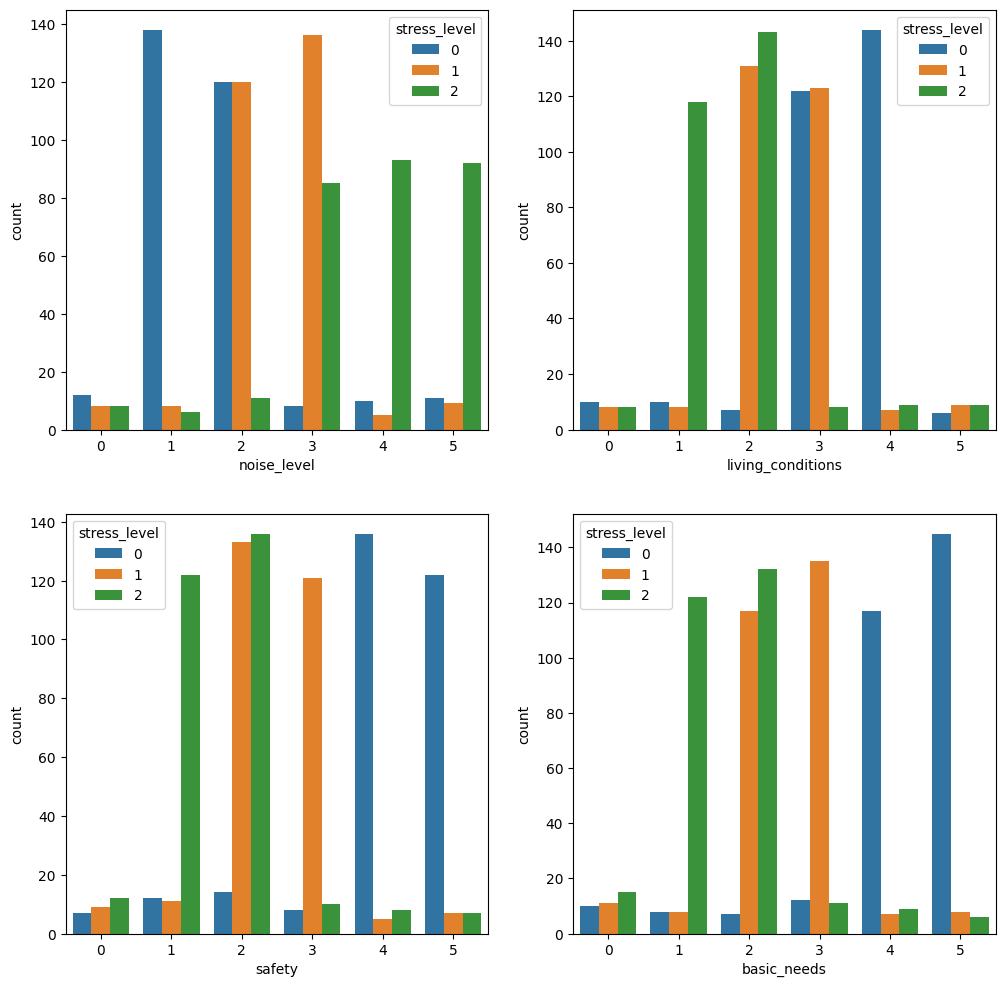

the field noise_level lacks 0
the field living_conditions lacks 0
the field safety lacks 0
the field basic_needs lacks 0


'\nnoise level: \n0: cân bằng\ntừ 1-5: chuyển dịch dần từ 0-->2\n\nliving conditions: \ndistress --> eustress --> stress\nđặc biệt: 5 là như nhau --> bởi vì nó sẽ ko còn trọng số, đó nó sẽ không còn phụ thuộc vào living conditions nữa.\n\nsafety:\n0: như nhau - indecisive\n1-5: distress --> eugenic --> ko stress\n\nbasic needs:\n0: như nhau.\ndistress --> eugenic --> no stress\n'

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = train_df.columns[8:12]
print(columns)

# sns.countplot(x = train_df['anxiety_level'], hue = train_df['stress_level'])
VariableAnalysis(train_df, columns)

'''
noise level: 
0: cân bằng
từ 1-5: chuyển dịch dần từ 0-->2

living conditions: 
distress --> eustress --> stress
đặc biệt: 5 là như nhau --> bởi vì nó sẽ ko còn trọng số, đó nó sẽ không còn phụ thuộc vào living conditions nữa.

safety:
0: như nhau - indecisive
1-5: distress --> eugenic --> ko stress

basic needs:
0: như nhau.
distress --> eugenic --> no stress
'''

<h2>Academic Factors</h2>

Index(['academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns'],
      dtype='object')


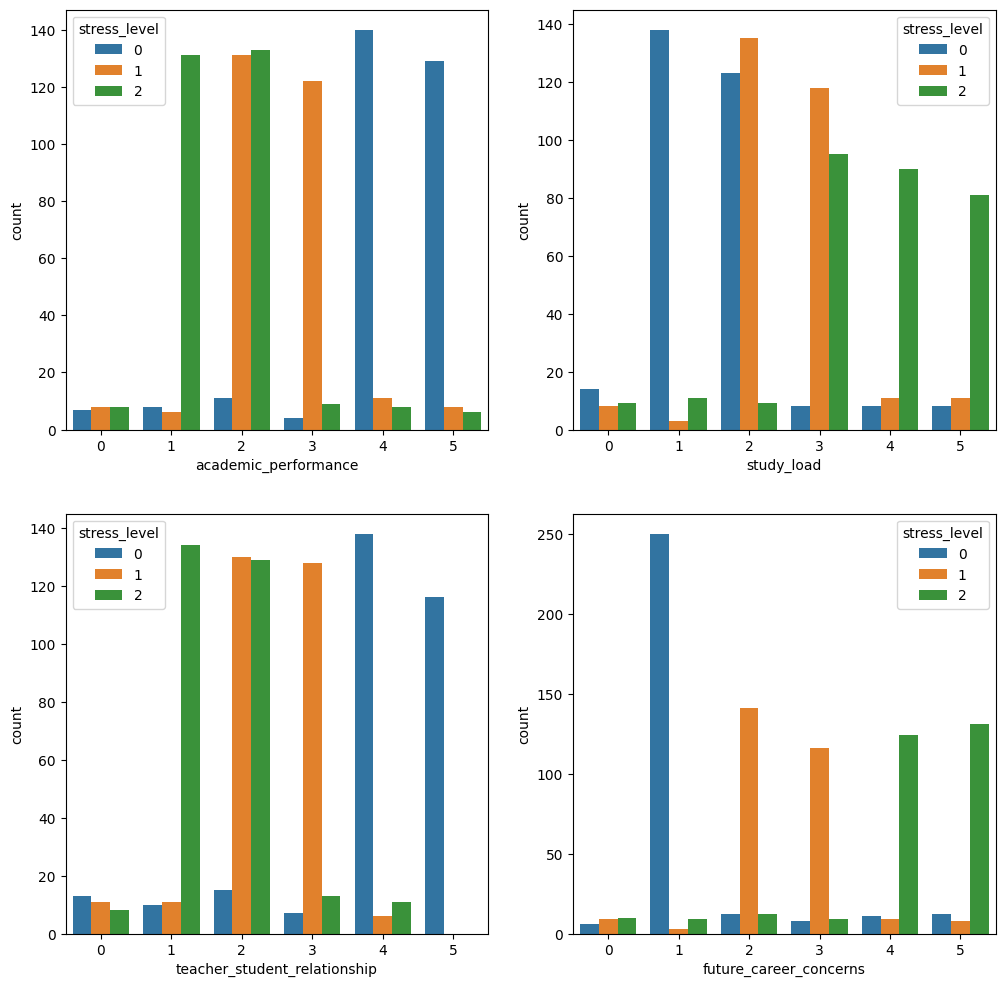

the field academic_performance lacks 0
the field study_load lacks 0
the field teacher_student_relationship lacks 0
the field future_career_concerns lacks 0


'\nacademic performance: \n0: cân bằng\ntừ 1-5: chuyển dịch dần từ 2-->0\n\nstudy load: \n\n0: cân bằng\ntừ 1-5: no stress --> no stress / eugenic --> eugenic / distress --> distress\n\nteacher-student relationship:\n0: như nhau - indecisive\n1-5: distress --> eugenic | distress --> ko stress\n\nfuture careers concern:\n0: như nhau.\ndistress --> eugenic --> no stress\n'

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = train_df.columns[12: 16]
print(columns)

VariableAnalysis(train_df, columns)

'''
academic performance: 
0: cân bằng
từ 1-5: chuyển dịch dần từ 2-->0

study load: 

0: cân bằng
từ 1-5: no stress --> no stress / eugenic --> eugenic / distress --> distress

teacher-student relationship:
0: như nhau - indecisive
1-5: distress --> eugenic | distress --> ko stress

future careers concern:
0: như nhau.
distress --> eugenic --> no stress
'''

<h2>Social Factors</h2>

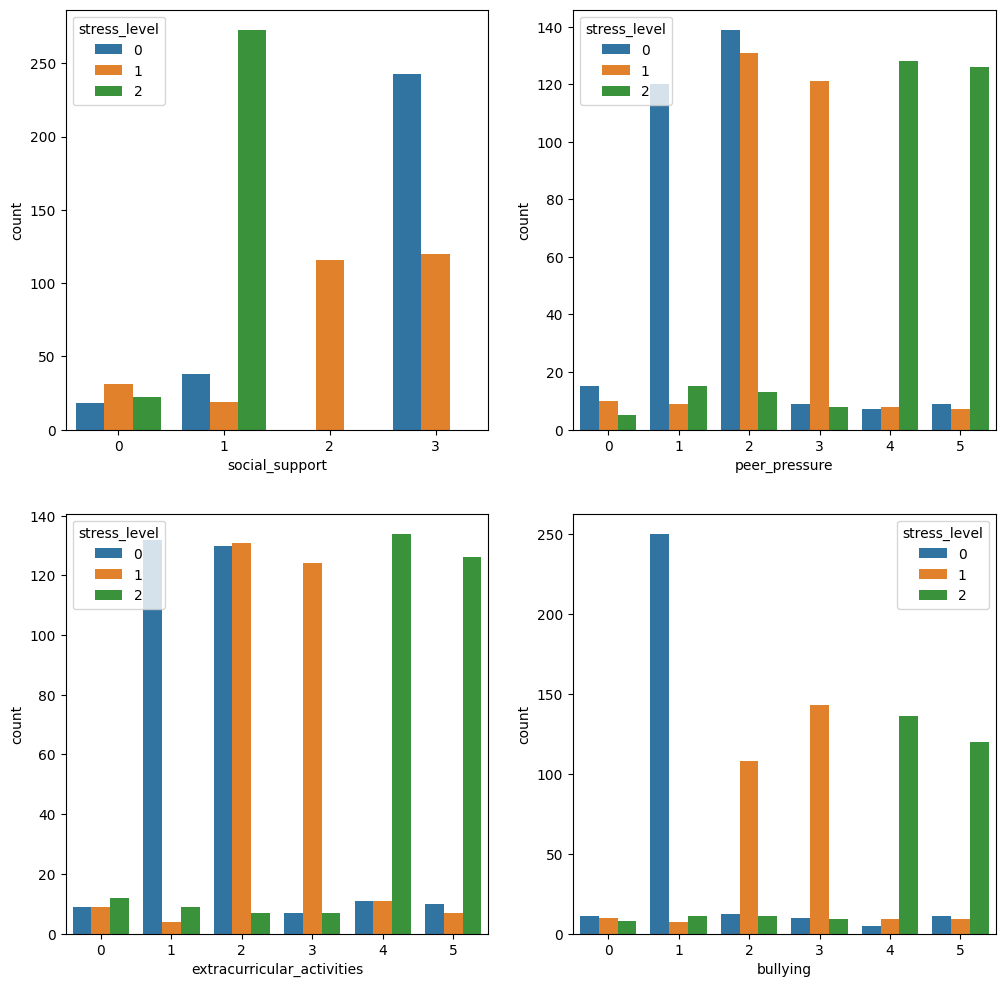

the field social_support lacks 0
the field peer_pressure lacks 0
the field extracurricular_activities lacks 0
the field bullying lacks 0


'\nsocial support: \n0: same\n1->2->3: distress --> eugenic stress --> no stress\n\npeer pressure: \n\n0: same\n1->5: no stress --> eugenic stress --> distress\n\nExtra-curricular activities:\n0: same\n1->5: no stress --> eugenic stress --> distress\n\nbullying:\n0: như nhau.\n1->5: distress --> eugenic stress --> no stress\n\n'

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = train_df.columns[16: 20]
VariableAnalysis(train_df, columns)

'''
social support: 
0: same
1->2->3: distress --> eugenic stress --> no stress

peer pressure: 

0: same
1->5: no stress --> eugenic stress --> distress

Extra-curricular activities:
0: same
1->5: no stress --> eugenic stress --> distress

bullying:
0: như nhau.
1->5: distress --> eugenic stress --> no stress

'''

<h1>Feature Engineering</h1>

In [11]:
sgn = [-1, 1, -1, -1, 
       -1, 1, 1, -1,
       -1, 1, 1, 1,
       1, -1, 1, -1,
       1, -1, -1, -1, 1]

train_df = pd.read_csv('/kaggle/input/uit-x-thpt-stress-dataset/train.csv')
# train_df = train_df * sgn

'''Nhận xét: Dataset bị đa cộng tuyến nặng'''

'Nhận xét: Dataset bị đa cộng tuyến nặng'

<h2>Visualize</h2>

blood_pressure            0.747463
bullying                  0.648598
sleep_quality             0.640837
future_career_concerns    0.605230
social_support            0.529834
depression                0.511642
headache                  0.481235
anxiety_level             0.443663
self_esteem               0.431370
academic_performance      0.426611
dtype: float64
             X          Y
0   -10.957408 -25.724707
1    45.722324  -6.271346
2   -32.719395  18.400978
3    32.210255  -1.600577
4   -50.188190   4.724802
..         ...        ...
875   3.493038 -22.256241
876  39.161343  -4.973248
877  30.918625  -3.360885
878 -42.864422   1.498957
879  42.553555  -3.403783

[880 rows x 2 columns]


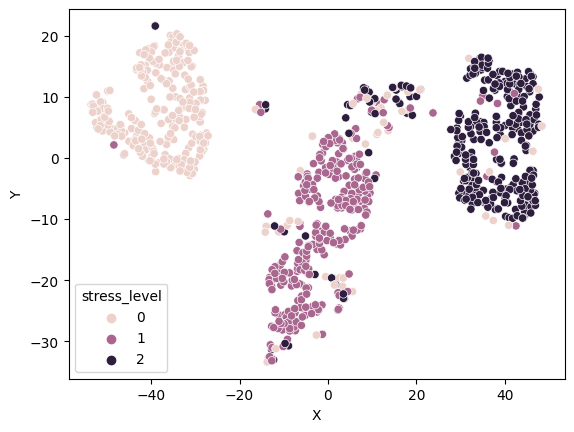

            X         Y
0   -0.517510 -1.291049
1    5.225767 -0.210824
2   -4.887888  0.608597
3    5.009357 -0.185942
4   -4.170398  0.034053
..        ...       ...
875 -0.145275  1.859761
876  4.251387  0.213784
877  3.690453  0.455586
878 -4.433522  0.125120
879  0.753315  0.753248

[880 rows x 2 columns]


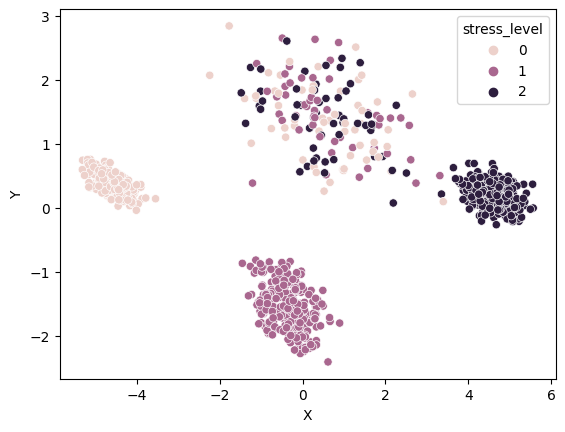

            X         Y
0   -4.619030  0.207602
1   -4.919597  0.560977
2    4.571701  0.107241
3    4.685417  0.313863
4   -0.434968  1.958760
..        ...       ...
215 -0.307114  2.635582
216 -1.289892  0.792771
217 -4.320491  0.311069
218  4.152689  0.108733
219 -4.324646  0.318099

[220 rows x 2 columns]


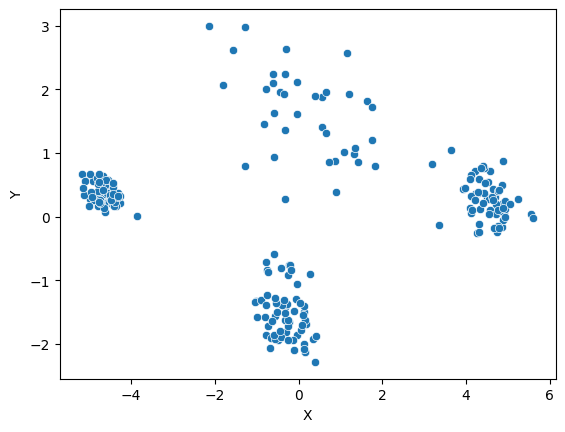

'\nNhận xét của ta là: các nhóm có đặc trưng khá rõ nhưng có một số\nphần tử không theo đặc trưng\n'

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import mutual_info_regression
import copy
#Visualize bằng TSNE

def scale(train_df, scaler, type):
    df = copy.deepcopy(train_df)
    label = []
    
    if (type == 'train'):
        label = train_df['stress_level']
        df = train_df.drop('stress_level', axis = 1)
        
    if (type == 'test'):
        label = train_df['id']
        df = train_df.drop('id', axis = 1)
        
    scaled_data = scaler.fit_transform(df)

    dict = pd.DataFrame(scaled_data, columns = df.columns, index = df.index)
    df = pd.concat([dict, label], axis = 1)
    return df


def visualize(train_df, decompose, type):
    df = copy.deepcopy(train_df)

    if (type == 'train'):
        label = train_df['stress_level']
        df = train_df.drop('stress_level', axis = 1)
        
    if (type == 'test'):
        label = train_df['id']
        df = train_df.drop('id', axis = 1)
        
    dataPoint = decompose.fit_transform(df)

    dict = pd.DataFrame(dataPoint, columns = ['X', 'Y'], index = df.index)
    print(dict)
    
    if (type == 'train'): sns.scatterplot(dict, x = dict['X'], y = dict['Y'], hue = label)
    if (type == 'test'): sns.scatterplot(dict, x = dict['X'], y = dict['Y'])
    plt.show()
    return (dataPoint, label)

def mutual_info(train_df):
    label = train_df['stress_level']
    inp = train_df.drop('stress_level', axis = 1)
    mi_scores = mutual_info_regression(inp, label)
    mi_series = pd.Series(mi_scores, index = inp.columns)
    mi_series = mi_series.sort_values(ascending=False)

    return mi_series

def getBestFeatures(train_df, threshold):
    ranking = mutual_info(train_df)
    filtered_df = ranking.loc[ranking > threshold]
    print(filtered_df)
    columns = filtered_df.index
    return columns

def chooseFeatures(train_df, features, type):
    label = []
    if (type == 'train'): 
        label = train_df['stress_level']
    if (type == 'test'):
        label = train_df['id']
        
    df = train_df[features]
    return pd.concat([df, label], axis = 1)
            
bestFeatures = getBestFeatures(train_df, 0.4)
df = chooseFeatures(train_df, bestFeatures, 'train')
visualize(df, TSNE(n_components = 2), 'train')

scaled_df = scale(train_df, StandardScaler(), 'train')
visualize(scaled_df, PCA(n_components = 2), 'train')


test_df = pd.read_csv('/kaggle/input/uit-x-thpt-stress-dataset/test.csv')
scaled_df = scale(test_df, StandardScaler(), 'test')
visualize(scaled_df, PCA(n_components = 2), 'test')
'''
Nhận xét của ta là: các nhóm có đặc trưng khá rõ nhưng có một số
phần tử không theo đặc trưng
'''


<h2>Transform</h2>

20
            X         Y
9    2.196997  0.665213
23  -0.583058  1.534133
34   0.116349 -0.280779
38   1.086556 -0.127595
41  -0.943348  1.599550
..        ...       ...
844 -1.069224 -2.443844
849  0.724787  0.746626
857  1.759350  1.262842
869 -0.777174  1.073798
879  1.590975  0.606191

[140 rows x 2 columns]


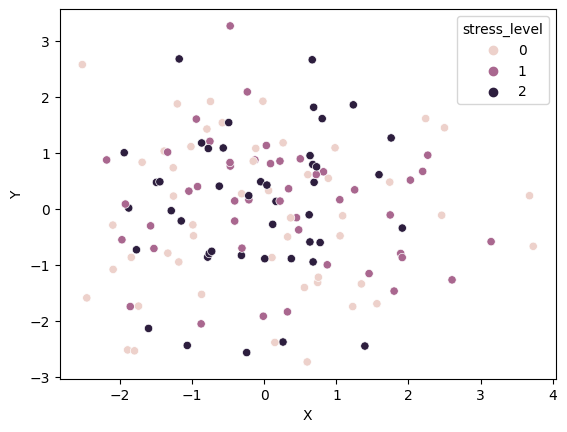

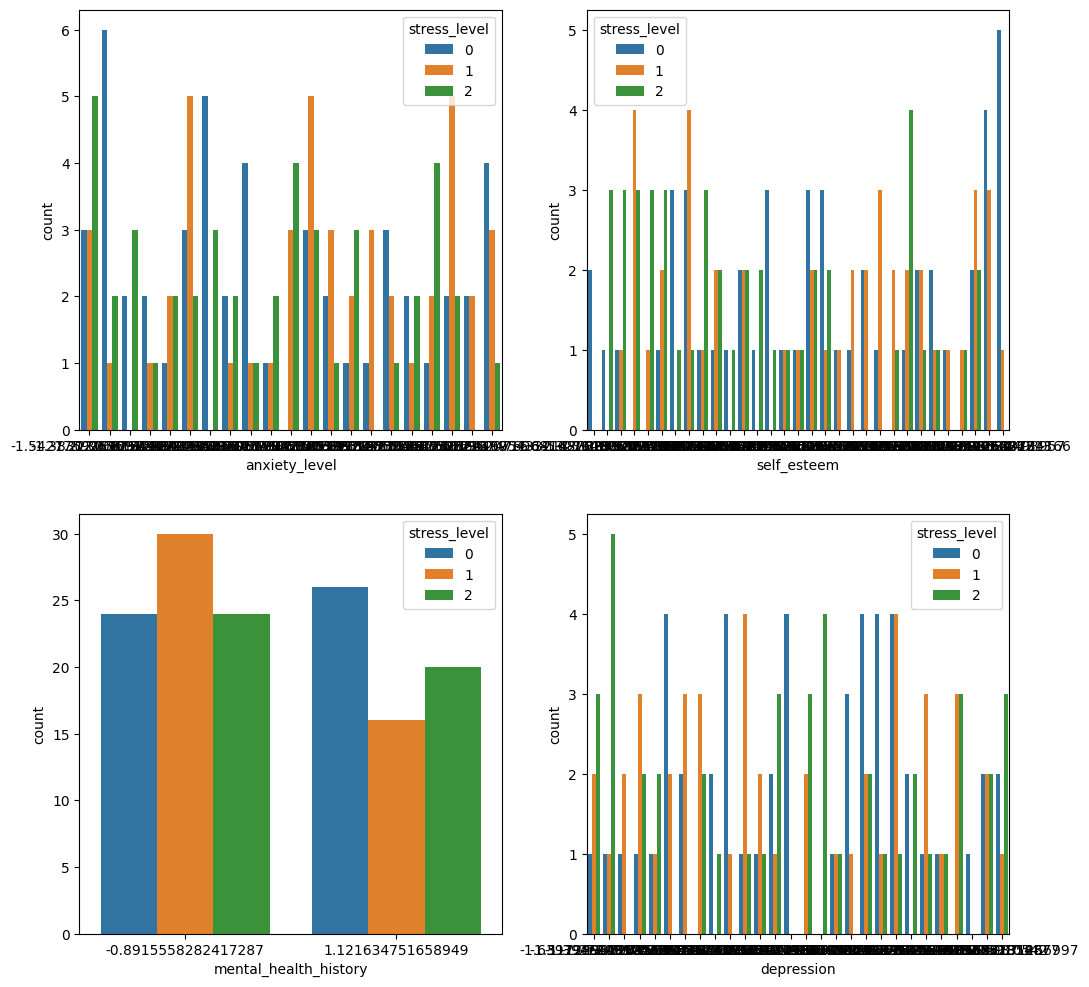

the field anxiety_level lacks 0
the field self_esteem lacks 0
the field mental_health_history lacks 0
the field depression lacks 0


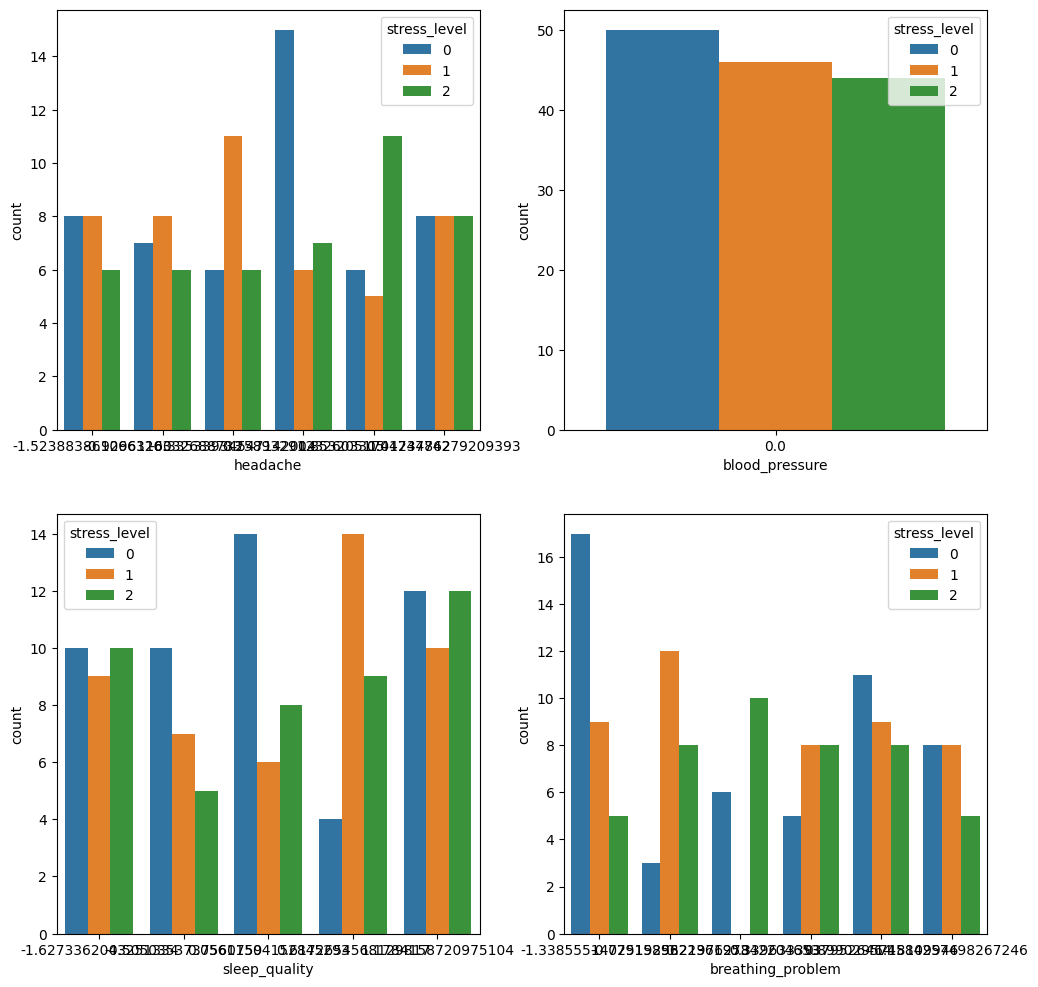

the field headache lacks 0
the field blood_pressure lacks 0
the field sleep_quality lacks 0
the field breathing_problem lacks 0


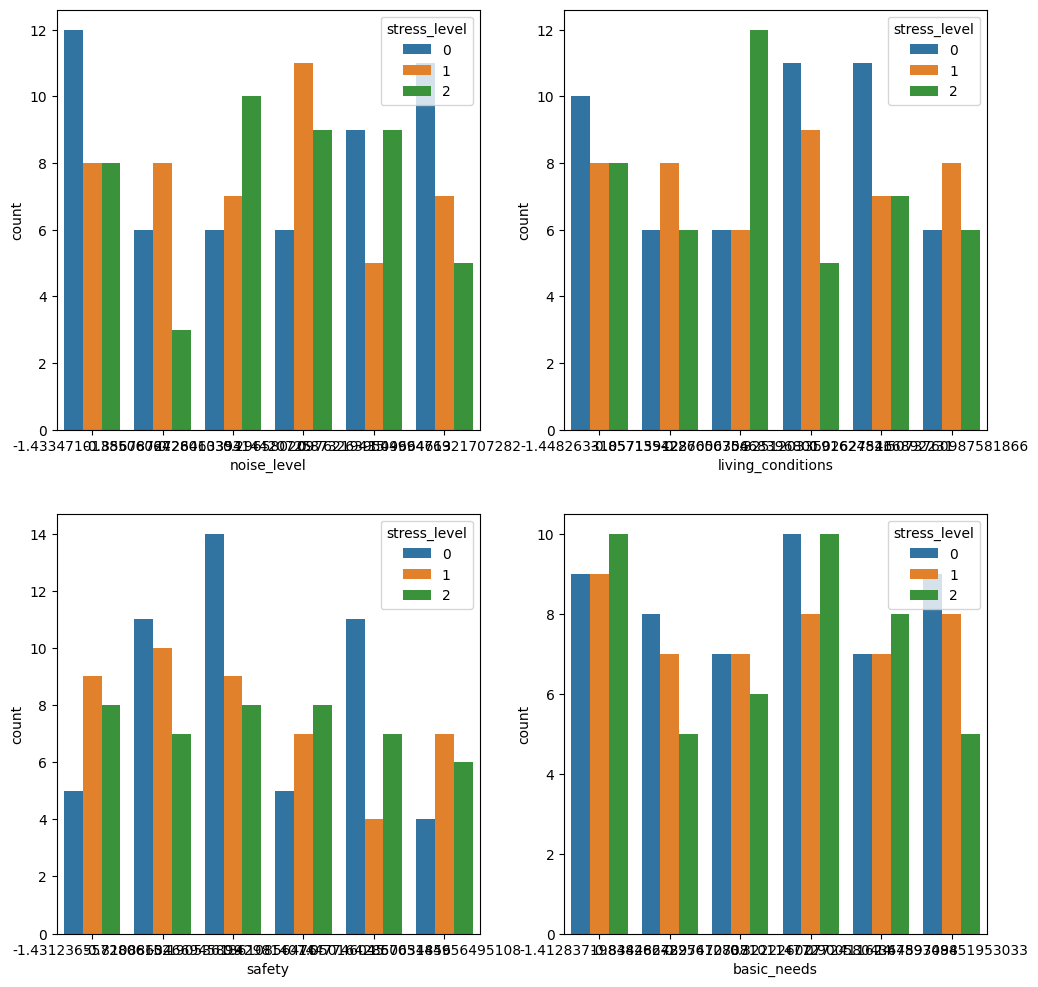

the field noise_level lacks 0
the field living_conditions lacks 0
the field safety lacks 0
the field basic_needs lacks 0


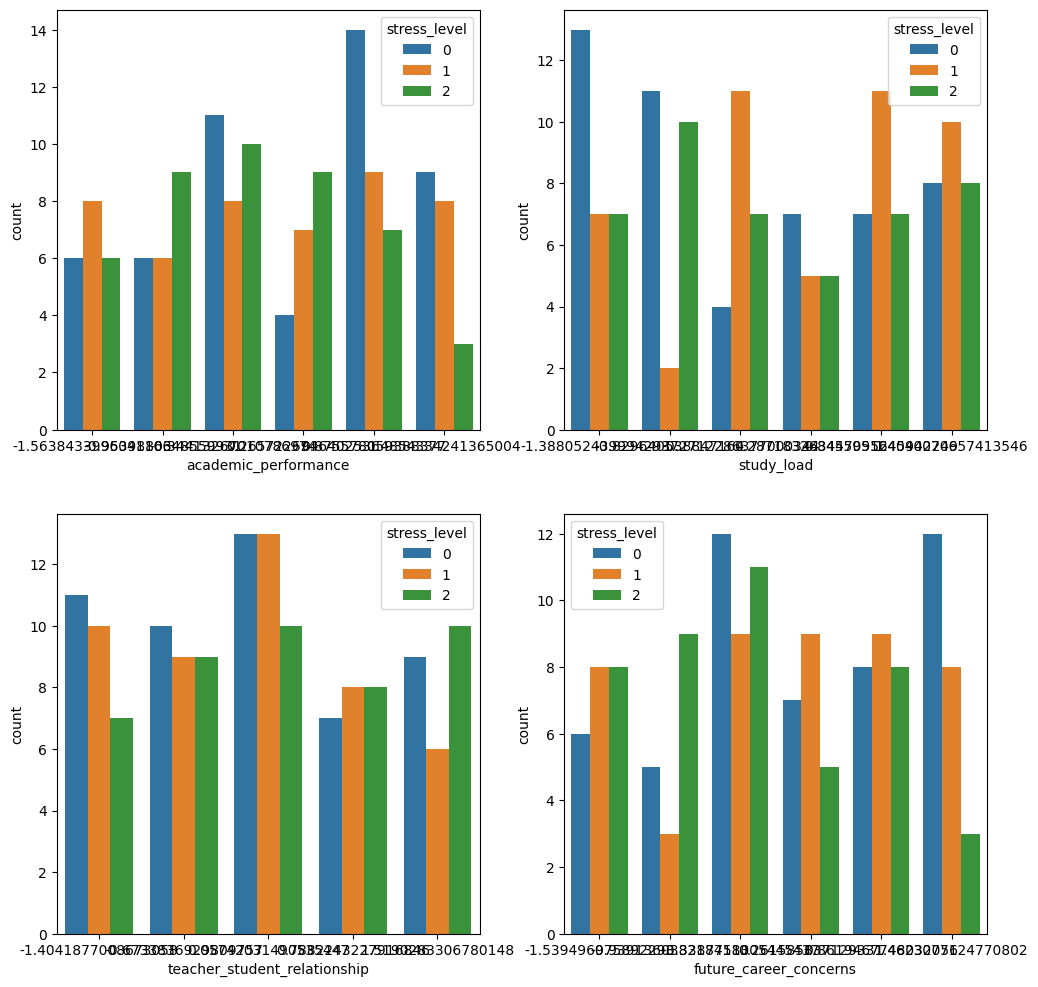

the field academic_performance lacks 0
the field study_load lacks 0
the field teacher_student_relationship lacks 0
the field future_career_concerns lacks 0


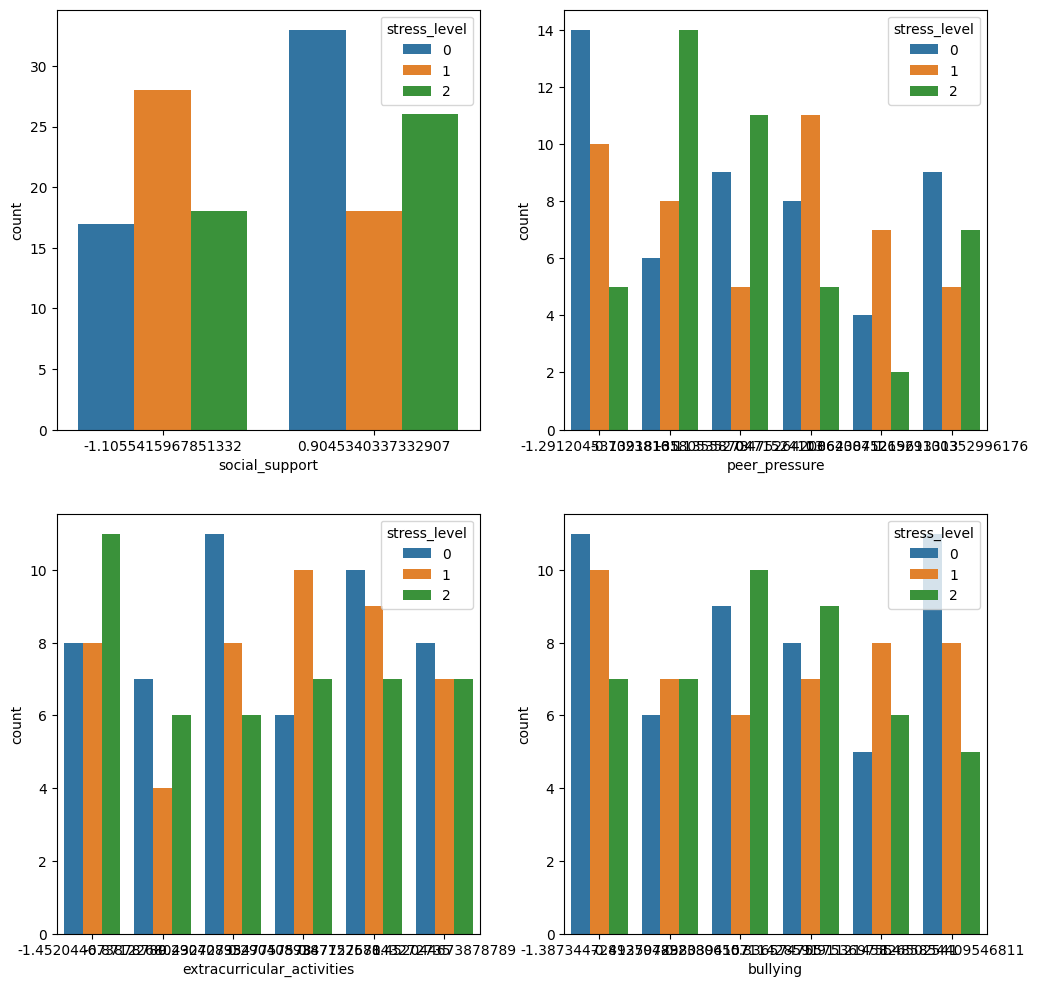

the field social_support lacks 0
the field peer_pressure lacks 0
the field extracurricular_activities lacks 0
the field bullying lacks 0


In [13]:
def pick(df, l, r, type):
    label = []
    columns = []
    if (type == 'train'):
        label = df['stress_level']
        columns = df.columns[l:r]
        
    if (type == 'test'):
        label = df['id']
        columns = df.columns[l:r]
        
    return pd.concat([df[columns], label], axis = 1)

# for i in range(5):
#     new_df = pick(train_df, i * 4, (i + 1) * 4, 'train')
#     scaled_new_df = scale(new_df, StandardScaler(), 'train')
#     visualize(new_df, TSNE(n_components = 2), 'train')

def Dimensionality(train_df, n_components, type):
    #Reduce dimensionality
    #Scale before using PCA

    label = []
    df = copy.deepcopy(train_df)
    if (type == 'train'):
        label = train_df['stress_level']
        df = train_df.drop('stress_level', axis = 1)
    if (type == 'test'):
        label = train_df['id']
        df = train_df.drop('id', axis = 1)   

    s = StandardScaler()
    scaled_data = s.fit_transform(df)
    df = pd.DataFrame(scaled_data, columns = df.columns, index = df.index)

    pca = PCA(n_components = n_components)
    
    decomposed_data = pca.fit_transform(df)
    pca_columns = [str(i) for i in range(n_components)]
    df = pd.DataFrame(decomposed_data, columns = pca_columns, index = df.index)
    df = pd.concat([df, label], axis = 1)
    return df;

np.random.seed(42)


def addFeature(train_df, featured_df, times = 0):
    new_df = train_df
    for i in range(times):
        
        new_df = pd.concat([new_df, featured_df], axis = 0)
        new_df.index = np.arange(0, len(new_df))
    return new_df
    
feature_set = np.load('/kaggle/input/uit-x-thpt-stress-dataset/feature_set.npy')
featured_df = train_df.loc[feature_set]

test_df = addFeature(train_df, featured_df, 4)
# print(test_df)
# print(featured_df.head(10))

def FeaturePlan(train_df, plan, type):
    if (plan == 1):
        label = []
        df = train_df
        df = df.loc[df['blood_pressure'] ==  3]
        df = df.loc[df['sleep_quality'] != 1]
        df = df.loc[df['anxiety_level'] != 0]
        # df = df.loc[df['social_support'] == 1]
        
        # df = df.drop('blood_pressure', axis = 1)
        # df = df.drop('breathing_problem', axis = 1)

        if (type == 'train'):
            # df = addFeature(train_df, featured_df, 4)
            label = df['stress_level']

            df = df.drop('stress_level', axis = 1)
        else:
            label = df['id']
            df = df.drop('id', axis = 1)

        # print(df)
        # columns = df.columns
        # df = df[columns[0:8]]
        s = StandardScaler()       

        # df = df.drop('mental_health_history', axis = 1)

        # df.loc[df['mental_health_history'] == 1, 'mental_health_history'] = -1
        # df.loc[df['mental_health_history'] == 0, 'mental_health_history'] = 1


        scaled_data = s.fit_transform(df)
        df = pd.DataFrame(scaled_data, columns = df.columns, index = df.index)

        # #Drop Physiological
                
        # #Drop Environmental
        
        # #Drop Academic

        # #Drop Social Factors
        
        output_df = pd.concat([df, label], axis = 1)
        print(len(df.columns))
        return output_df

test_df = FeaturePlan(train_df, 1, 'train')
dataPoint, _ = visualize(test_df, PCA(n_components = 2), 'train')

special_indices = np.array([]) 
panel_df = pd.DataFrame({})
cnt = 0
for i in range(len(dataPoint)):
    x = dataPoint[i, 0]
    y = dataPoint[i, 1]
    if (x >= 0 and x <= 4 and y >= -4 and y <= 4):
        # if (cnt <= 5): 
            # print(train_df.loc[i])
            # print(x, y)/
        special_indices = np.hstack([special_indices, i])
        cnt += 1
# print(special_indices)

for i in range(5):
    VariableAnalysis(test_df, test_df.columns[(i * 4):(i + 1) * 4])



<h1>Mô hình</h1>

In [14]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import copy
from torch.optim.lr_scheduler import ReduceLROnPlateau


<h2>Machine Learning</h2>

In [15]:
def MachineLearning(input, target, model, name, test_size = 0.001):
    print(f'Train {name} model ')
    train_input, validate_input, train_output, validate_output = train_test_split(input, target, random_state = 42, test_size = test_size)

    X_train = train_input
    X_valid = validate_input
    y_train = train_output
    y_valid = validate_output

    m = copy.deepcopy(model) 
    m.fit(X_train, y_train)
    preds = m.predict(X_valid)
    accuracy = accuracy_score(preds, y_valid) * 100
    print(f'VALIDATE ACCURACY of {name}: {accuracy}')
    return m
    
def runML(train_df):
    df = copy.deepcopy(train_df)
    
    inp = df.drop('stress_level', axis = 1).values
    tgt = df['stress_level'].values
    
    listML = {}
    MLcandidates = [RandomForestClassifier(random_state = 42,
                                           max_depth = 30,
                                           n_estimators = 100,
                                           max_leaf_nodes = 40),
                    CatBoostClassifier(random_state = 42, 
                                       iterations = 600,
                                       learning_rate = 1e-5,
                                       loss_function = 'MultiClass',
                                       verbose = False,
                                       ),
                    XGBClassifier(random_state = 42,
                                  learning_rate = 1e-4,
                                  max_depth = 7,
                                  n_estimators = 30,
                                  gamma = 0,
                                  alpha = 1,
                                  min_child_weight = 10,
                                  objective = 'multi:softmax',
                                  subsample = 0.7,
                                  colsample_bytree = 0.7),
                    
                    SVC(kernel = 'poly', degree = 7, gamma = 'auto', C = 0.5, decision_function_shape = 'ovo'),
                    KNeighborsClassifier(n_neighbors = 9)
                   ]
    MLname = ['RandomForest', 'CatBoost', 'XGBoost', 'SVM', 'KNN']
    for i, name in enumerate(MLname):
        listML[name] = MachineLearning(inp, tgt, MLcandidates[i], name)
    return listML


20
            X         Y
9    2.196997  0.665213
23  -0.583058  1.534133
34   0.116349 -0.280779
38   1.086556 -0.127595
41  -0.943348  1.599550
..        ...       ...
844 -1.069224 -2.443844
849  0.724787  0.746626
857  1.759350  1.262842
869 -0.777174  1.073798
879  1.590975  0.606191

[140 rows x 2 columns]


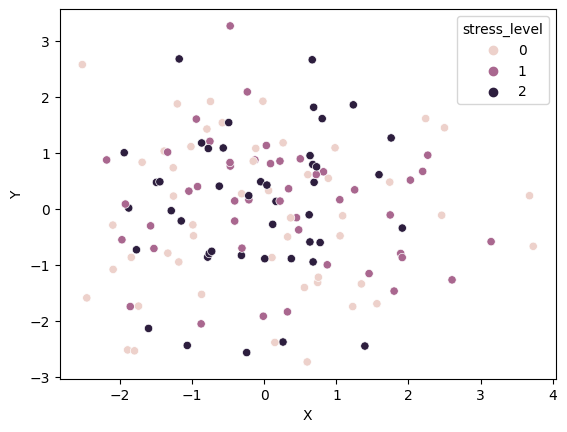

Train RandomForest model 
VALIDATE ACCURACY of RandomForest: 0.0
Train CatBoost model 
VALIDATE ACCURACY of CatBoost: 0.0
Train XGBoost model 
VALIDATE ACCURACY of XGBoost: 100.0
Train SVM model 
VALIDATE ACCURACY of SVM: 100.0
Train KNN model 
VALIDATE ACCURACY of KNN: 0.0


In [16]:
input_df = train_df
input_df = FeaturePlan(input_df, 1, 'train')

visualize(input_df, PCA(n_components = 2), 'train')
listML = runML(input_df)


<h3>Feature Set </h3>

In [17]:
def compare(input_df, model):
    tgt = input_df['stress_level']
    inp = input_df.drop('stress_level', axis = 1)
    pred_label = model.predict(inp)
    pred_label = pred_label.reshape(-1)
    comparison = (pred_label == tgt)

    wrong_id_ML = []
    
    for i, cmp in enumerate(comparison):
        if (cmp == False):
            wrong_id_ML.append(i)
    
    print(wrong_id_ML, len(wrong_id_ML))
    
    return wrong_id_ML

df = FeaturePlan(train_df, 1, 'train')
FeatureSetML = compare(df, listML['KNN'])

20
[3, 4, 5, 8, 12, 15, 16, 17, 22, 28, 29, 30, 31, 32, 36, 37, 42, 44, 47, 51, 53, 54, 56, 58, 59, 60, 64, 70, 72, 76, 78, 79, 81, 82, 84, 85, 87, 91, 95, 96, 97, 100, 101, 102, 107, 108, 110, 111, 112, 113, 117, 119, 120, 122, 125, 127, 130, 131, 133, 134, 136, 137, 138, 139] 64


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


<h2>Machine Learning Test</h2>

In [18]:
test_df = pd.read_csv('/kaggle/input/uit-x-thpt-stress-dataset/test.csv')


def export(input_df):
    
    
    id = input_df['id']

    input_df = FeaturePlan(test_df, 1, 'test')
    inp = input_df.drop('id', axis = 1)

    
    tgt3 = listML['CatBoost'].predict(inp)

    print(tgt3.shape)
    tgt = np.array([])
    ptr = 0

    for i in range(len(test_df)):
        x = test_df.loc[i, 'blood_pressure']
        
        if (x == 1): tgt = np.hstack([tgt, 1])
        elif (x == 2): tgt = np.hstack([tgt, 0])
        elif (x == 3): 
            y = test_df.loc[i, 'sleep_quality']
            if (y == 1): tgt = np.hstack([tgt, 2])
            else:
                tgt = np.hstack([tgt, 0])

    
    dict = {'id': id, 'output': tgt}
    
    output = pd.DataFrame(dict)
    output.to_csv('ML.csv', index = False)
    return tgt

# input_df = scale(test_df, StandardScaler(), 'test')
# input_df = chooseFeatures(input_df, bestFeatures, 'test')
# input_df = Dimensionality(test_df, 16, 'test')
input_df = test_df
answer = export(input_df)
print(answer, len(answer))

20
(30, 1)
[0. 0. 2. 2. 2. 0. 2. 0. 1. 0. 1. 0. 0. 2. 0. 1. 1. 2. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 2. 2. 2. 2. 2. 0. 0. 2. 0. 0. 2. 0. 1.
 2. 0. 1. 1. 1. 1. 0. 2. 0. 0. 0. 0. 1. 0. 0. 2. 1. 1. 2. 0. 2. 2. 2. 1.
 2. 1. 2. 1. 0. 2. 0. 1. 1. 2. 2. 1. 0. 0. 1. 1. 1. 2. 2. 0. 0. 1. 0. 2.
 2. 0. 0. 1. 2. 2. 0. 1. 2. 1. 2. 2. 0. 0. 2. 0. 0. 1. 1. 2. 1. 0. 2. 2.
 0. 2. 2. 2. 0. 0. 1. 1. 0. 2. 0. 2. 0. 1. 2. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 2. 1. 0. 1. 2. 0. 2. 0. 0. 1. 1. 2. 0. 0. 1. 0. 2. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 1. 2. 2. 2. 2. 0. 0. 0. 1. 0. 1. 1. 2. 2. 1. 1. 0. 1. 1. 2. 1.
 0. 0. 2. 0. 2. 1. 0. 2. 2. 2. 2. 2. 0. 2. 0. 0. 1. 0. 2. 0. 0. 2. 2. 2.
 0. 0. 2. 0.] 220


<h2>Deep Learning</h2>

In [19]:
class ClassifyingModel(nn.Module):
    '''
    Một mô hình Phân loại đơn giản với 4 layer:
    Layer1: FC(input_dim --> 1024) + ReLU
    Layer2: FC(1024 --> 1024) + dropout
    Layer3: FC(1024 --> 1024) + ReLU
    Classify: FC(1024, 3)
    '''
    def __init__(self, input_dim, output_dim, dropout = 0.1):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.classification_head = nn.Linear(512, output_dim)
        self.relu = F.relu
        self.gelu = F.gelu
        self.tanh = F.tanh
        self.dropout = nn.Dropout(p = dropout)
        
    def forward(self, x):
        x1 = self.fc1(x)
        x1 = self.dropout(x1)
        x1 = self.relu(x1)
        
        x2 = self.fc2(x1)
        x2 = self.dropout(x2)
        x2 = self.tanh(x2)

        x3 = self.fc3(x2)
        x3 = self.dropout(x3)

        x3 = self.relu(x3)
        
        logits = self.classification_head(x3)
        return logits
        

In [20]:
       
def train_nn(input, target, input_dim, output_dim, name = "neural_network", 
             epochs = 50, test_size = 0.2, dropout_p = 0.1, batch_size = 16):
    '''
    Return a model that is trained on the dataset X, y
    The training steps are as followed:
    - Split the set into 2 sets of training and validating.
    - Train model
    '''
    device = 'cpu'
    if (torch.cuda.is_available()): device = 'cuda'
    
    print(f'Train {name} Model')
    epochs = epochs
    train_input, validate_input, train_output, validate_output = train_test_split(input, target, test_size = test_size, random_state = 42)

    X_train = torch.tensor(train_input, dtype = torch.float32)
    X_valid = torch.tensor(validate_input, dtype = torch.float32)
    y_train = torch.tensor(train_output, dtype = torch.long)
    y_valid = torch.tensor(validate_output, dtype = torch.long)
    print(len(X_train), len(y_train))

    train_dataset = TensorDataset(X_train, y_train)
    valid_dataset = TensorDataset(X_valid, y_valid)
    
    num_train_samples = len(train_dataset)
    num_valid_samples = len(valid_dataset)
    
    train_batch = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
    valid_batch = DataLoader(valid_dataset, batch_size = batch_size, shuffle = True)

    criterion = nn.CrossEntropyLoss(label_smoothing = 0.1)
    model = ClassifyingModel(input_dim, output_dim, dropout = dropout_p)
    model.to(device)

    optimizer = optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-4)
    
    best_accuracy = 0
    best_model = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        train_accuracy = 0
        valid_loss = 0
        valid_accuracy = 0
        
        for X_batch, y_batch in train_batch:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            optimizer.zero_grad()
            
            pred_logits = model(X_batch)
            pred_label = pred_logits.argmax(dim = 1)
            

            loss = criterion(pred_logits, y_batch)
            accuracy = (pred_label == y_batch).sum()
            
            train_loss += loss.item() / num_train_samples 
            train_accuracy += accuracy.item() / num_train_samples

            loss.backward()
            optimizer.step()

        model.eval()
        for X_batch, y_batch in valid_batch:     
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            pred_logits = model(X_batch)
            pred_label = pred_logits.argmax(dim = 1)

            loss = criterion(pred_logits, y_batch)
            accuracy = (pred_label == y_batch).sum()
            
            
            valid_loss += loss.item() / num_valid_samples 
            valid_accuracy += accuracy.item() / num_valid_samples

                       
        if ((epoch + 1) % 10 == 0):
            print(f'------------------Epoch {epoch + 1}--------------')
            print(f'Train Loss: {train_loss} | Train Accuracy {train_accuracy * 100}')
            print(f'Validate Loss: {valid_loss} | Validate Accuracy: {valid_accuracy * 100}')

                
        if (valid_accuracy > best_accuracy):
            best_accuracy = valid_accuracy
            torch.save(model.state_dict(), 'checkpoint.pth')

    return model
    
def getModel(train_df):
    df = copy.deepcopy(train_df)
    inp = df.drop('stress_level', axis = 1).values
    
    input_dim = len(df.columns) - 1
    output_dim = 3
    
    tgt = df['stress_level'].values
    
    neural_network = train_nn(inp, tgt, input_dim, output_dim, 
                              epochs = 200, dropout_p = 0.1, test_size = 0.1, batch_size = 16)
    neural_network.load_state_dict(torch.load('/kaggle/working/checkpoint.pth'))
    return neural_network

In [21]:

# input_df = addFeature(train_df, featured_df, times = 4)
# input_df = Dimensionality(input_df, 20, 'train')
# input_df = scale(input_df, StandardScaler(), 'train')
input_df = FeaturePlan(train_df, 1, 'train')
print(input_df.head(5))

neural_network = getModel(input_df)

20
    anxiety_level  self_esteem  mental_health_history  depression  headache  \
9       -1.063511     1.081491              -0.891556    1.056720 -1.523884   
23      -1.542776     0.972564              -0.891556    0.689013  0.258933   
34       0.054773     0.863637              -0.891556    1.546997  1.447477   
38       1.332812     0.101147              -0.891556   -0.536677  0.853205   
41       0.534038     0.210074              -0.891556   -0.168970  1.447477   

    blood_pressure  sleep_quality  breathing_problem  noise_level  \
9              0.0       0.056115           0.899030    -1.433471   
23             0.0      -0.505035           0.339633     0.873264   
34             0.0      -1.627336           0.339633    -1.433471   
38             0.0       0.056115           1.458426    -0.856787   
41             0.0       0.617265           1.458426     1.449948   

    living_conditions  ...  basic_needs  academic_performance  study_load  \
9           -0.857135  ...    

<h3>Deep Learning Feature Set</h3>

In [22]:
def compare(input_df, model):
    '''Return the comparision between targetted label and predicted label'''
    df = copy.deepcopy(input_df)

    
    tgt = torch.tensor(df['stress_level'].values, dtype = torch.float32)
    df = df.drop('stress_level', axis = 1)
    
    inp = torch.tensor(df.values, dtype = torch.float32)

    pred_logits = model(inp)

    pred_label = pred_logits.argmax(dim = 1)

    comparison = (pred_label == tgt)

    wrong_id_DL = []
    
    for i, cmp in enumerate(comparison):
        if (cmp == False):
            wrong_id_DL.append(i)
    
    return wrong_id_DL

df = FeaturePlan(train_df, 1, 'train')
FeatureSetDL = compare(df, neural_network)
print(FeatureSetDL, len(FeatureSetDL))

'''Get Feature Set through DEEP LEARNING'''

20
[12, 14, 22, 38, 42, 47, 50, 53, 56, 67, 81, 100, 108, 109, 111, 112, 113, 119, 133] 19


'Get Feature Set through DEEP LEARNING'

<h2>Deep Learning Test</h2>

In [23]:
test_df = pd.read_csv('/kaggle/input/uit-x-thpt-stress-dataset/test.csv')

def export(input_df):
    id = input_df['id']
    input_df = FeaturePlan(input_df, 1, 'test')

    inp = input_df.drop('id', axis = 1).values
    
    tensor_inp = torch.tensor(inp, dtype = torch.float32)
    print(tensor_inp.shape)

    tgt3 = neural_network(tensor_inp)
    tgt3 = tgt3.argmax(1).to('cpu')
    print(tgt3.shape)

    tgt = np.array([])
    ptr = 0

    for i in range(len(test_df)):
        x = test_df.loc[i, 'blood_pressure']
        
        if (x == 1): tgt = np.hstack([tgt, 1])
        elif (x == 2): tgt = np.hstack([tgt, 0])
        elif (x == 3): 
            y = test_df.loc[i, 'sleep_quality']
            if (y == 1): tgt = np.hstack([tgt, 2])
            else:
                tgt = np.hstack([tgt, tgt3[ptr]])
                ptr += 1
     
            
    output = pd.DataFrame({'id': id, 'stress_level': tgt })
    output.to_csv('DL.csv', index = False)
    return tgt

input_df = test_df

# input_df = scale(input_df, StandardScaler(), 'test')
# input_df = Dimensionality(test_df, 18, 'test')

result = export(input_df)

print(result)




20
torch.Size([30, 20])
torch.Size([30])
[0. 0. 2. 2. 2. 0. 2. 1. 1. 0. 1. 0. 0. 2. 0. 1. 1. 2. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 2. 1. 1. 1. 2. 0. 2. 2. 2. 2. 2. 0. 0. 2. 0. 0. 2. 0. 1.
 2. 0. 1. 1. 1. 1. 0. 2. 2. 0. 0. 0. 1. 0. 0. 2. 1. 1. 2. 0. 2. 2. 2. 1.
 2. 1. 2. 1. 0. 2. 0. 1. 1. 2. 2. 1. 0. 2. 1. 1. 1. 2. 2. 0. 0. 1. 0. 2.
 2. 2. 0. 1. 2. 2. 0. 1. 2. 1. 2. 2. 0. 0. 2. 0. 2. 1. 1. 2. 1. 0. 2. 2.
 0. 2. 2. 2. 0. 1. 1. 1. 0. 2. 0. 2. 2. 1. 2. 1. 1. 1. 0. 1. 2. 1. 1. 1.
 2. 1. 0. 1. 2. 0. 2. 0. 0. 1. 1. 2. 0. 2. 1. 0. 2. 0. 0. 0. 1. 1. 1. 1.
 2. 1. 0. 1. 2. 2. 2. 2. 0. 0. 2. 1. 0. 1. 1. 2. 2. 1. 1. 0. 1. 1. 2. 1.
 0. 0. 2. 2. 2. 1. 0. 2. 2. 2. 2. 2. 1. 2. 2. 0. 1. 0. 2. 0. 0. 2. 2. 2.
 0. 0. 2. 0.]
